In [1]:
import numpy as np

In [4]:
class1_data = np.loadtxt('nls_data/class1.txt', delimiter=',')
class2_data = np.loadtxt('nls_data/class2.txt', delimiter=',')
print(class1_data.shape)
print(class2_data.shape)

(1000, 2)
(1000, 2)


In [5]:
class1_label = np.zeros((class1_data.shape[0], 1))  #Label for class1 is 0
class2_label = np.ones((class2_data.shape[0], 1))   #Label for class2 is 1

In [17]:
# Combining data and labels
data = np.concatenate((class1_data, class2_data), axis=0)
labels = np.concatenate((class1_label, class2_label), axis=0)
labels

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [18]:
# Shuffling the data
shuffled_indices = np.random.permutation(data.shape[0])
data = data[shuffled_indices]
labels = labels[shuffled_indices]
data
labels
print(data.shape)
print(labels.shape)
labels

(2000, 2)
(2000, 1)


array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [8]:
normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = normalized_data
data

array([[-1.038074  ,  0.94500282],
       [ 1.16278309,  1.34692547],
       [-0.82450117, -1.17371062],
       ...,
       [-0.67926653, -1.54797119],
       [-0.71872051, -1.30880331],
       [ 0.81807871,  1.02597091]])

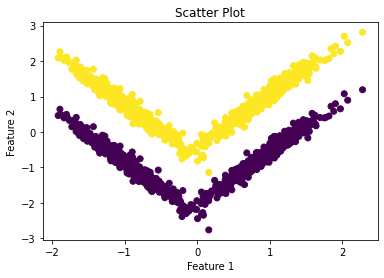

In [9]:
import matplotlib.pyplot as plt

f1 = [d[0] for d in data]
f2 = [d[1] for d in data]


plt.scatter(f1,f2, c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot")

plt.show()

In [20]:
#Splitting data for training and testing

train_ratio = 0.8  
train_size = int(data.shape[0] * train_ratio)
train_data = data[:train_size]
train_labels = labels[:train_size]
test_data = data[train_size:]
test_labels = labels[train_size:]

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(1600, 2)
(400, 2)
(1600, 1)
(400, 1)


In [54]:
# Architecture of the neural network
input_size = data.shape[1]       # Number of features
hidden_sizes = [384, 512]        # Two hidden layers with 256 and 512 units respectively
output_size = 2                  # Two classes

In [61]:
# Initializing the weights and biases
np.random.seed(42)
wh1 = np.random.randn(input_size, hidden_sizes[0]) * 0.01
bh1 = np.zeros((1, hidden_sizes[0]))
wh2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.01
bh2 = np.zeros((1, hidden_sizes[1]))
wo = np.random.randn(hidden_sizes[1], output_size) * 0.01
bo = np.zeros((1, output_size))

In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [64]:
# Model Training
epochs = 200
learning_rate = 0.0001
losses = []

for epoch in range(epochs):
    # Forward Computation
    hidden_layer1_activation = np.dot(train_data, wh1) + bh1
    hidden_layer1_output = sigmoid(hidden_layer1_activation)
    hidden_layer2_activation = np.dot(hidden_layer1_output, wh2) + bh2
    hidden_layer2_output = sigmoid(hidden_layer2_activation)
    output_layer_activation = np.dot(hidden_layer2_output, wo) + bo
    predicted_labels = sigmoid(output_layer_activation)
    
    # Loss Function
    loss = np.mean(np.square(predicted_labels - train_labels))
    losses.append(loss)
    
    # Backpropagation
    error = train_labels - predicted_labels
    d_predicted_labels = error * sigmoid_derivative(predicted_labels)
    error_hidden2 = d_predicted_labels.dot(wo.T)
    d_hidden_layer2 = error_hidden2 * sigmoid_derivative(hidden_layer2_output)
    error_hidden1 = d_hidden_layer2.dot(wh2.T)
    d_hidden_layer1 = error_hidden1 * sigmoid_derivative(hidden_layer1_output)
    
    # Updating the weights and biases
    wo += hidden_layer2_output.T.dot(d_predicted_labels) * learning_rate
    bo += np.sum(d_predicted_labels, axis=0, keepdims=True) * learning_rate
    wh2 += hidden_layer1_output.T.dot(d_hidden_layer2) * learning_rate
    bh2 += np.sum(d_hidden_layer2, axis=0, keepdims=True) * learning_rate
    wh1 += train_data.T.dot(d_hidden_layer1) * learning_rate
    bh1 += np.sum(d_hidden_layer1, axis=0, keepdims=True) * learning_rate

In [65]:
# Predicting on train data
hidden_layer_activation1_train = np.dot(train_data, wh1) + bh1
hidden_layer_output1_train = sigmoid(hidden_layer_activation1_train)

hidden_layer_activation2_train = np.dot(hidden_layer_output1_train, wh2) + bh2
hidden_layer_output2_train = sigmoid(hidden_layer_activation2_train)

output_layer_activation_train = np.dot(hidden_layer_output2_train, wo) + bo
predicted_labels_train = sigmoid(output_layer_activation_train)
predicted_labels_train = np.round(predicted_labels_train).astype(int)

print("Loss:", losses)
print("Predicted labels for train data:", predicted_labels_train.flatten())
print("Actual labels:", train_labels.flatten())

# Accuracy
accuracy = (predicted_labels_train == train_labels).mean() * 100
print("Accuracy:", accuracy, "%")

Loss: [0.2427035438894992, 0.2425682835403764, 0.24243001982534843, 0.24228867400488102, 0.24214416506988662, 0.2419964096746017, 0.24184532206771128, 0.24169081402170398, 0.2415327947604451, 0.24137117088495663, 0.24120584629739844, 0.24103672212324947, 0.24086369663169144, 0.24068666515420453, 0.2405055200013895, 0.2403201503780388, 0.24013044229648484, 0.23993627848826427, 0.23973753831414416, 0.23953409767256761, 0.23932582890658616, 0.2391126007093598, 0.2388942780283177, 0.23867072196808745, 0.238441789692317, 0.23820733432452998, 0.23796720484817513, 0.23772124600604969, 0.23746929819929904, 0.23721119738622037, 0.23694677498112263, 0.23667585775352343, 0.23639826772799516, 0.23611382208500425, 0.23582233306312347, 0.23552360786303514, 0.23521744855378426, 0.2349036519817841, 0.234582009683124, 0.23425230779977987, 0.23391432700038067, 0.23356784240624287, 0.23321262352344405, 0.2328484341817741, 0.2324750324814682, 0.2320921707487017, 0.2316995955009013, 0.23129704742300966, 0.

In [66]:
# Model Testing
hidden_layer_activation1_test = np.dot(test_data, wh1) + bh1
hidden_layer_output1_test = sigmoid(hidden_layer_activation1_test)

hidden_layer_activation2_test = np.dot(hidden_layer_output1_test, wh2) + bh2
hidden_layer_output2_test = sigmoid(hidden_layer_activation2_test)

output_layer_activation_test = np.dot(hidden_layer_output2_test, wo) + bo
predicted_labels_test = sigmoid(output_layer_activation_test)
predicted_labels_test = np.round(predicted_labels_test).astype(int)

print("Loss:", losses)
print("Predicted labels for test data:", predicted_labels_test.flatten())
print("Actual labels:", test_labels.flatten())

# Accuracy
accuracy = (predicted_labels_test == test_labels).mean() * 100
print("Accuracy:", accuracy, "%")

Loss: [0.2427035438894992, 0.2425682835403764, 0.24243001982534843, 0.24228867400488102, 0.24214416506988662, 0.2419964096746017, 0.24184532206771128, 0.24169081402170398, 0.2415327947604451, 0.24137117088495663, 0.24120584629739844, 0.24103672212324947, 0.24086369663169144, 0.24068666515420453, 0.2405055200013895, 0.2403201503780388, 0.24013044229648484, 0.23993627848826427, 0.23973753831414416, 0.23953409767256761, 0.23932582890658616, 0.2391126007093598, 0.2388942780283177, 0.23867072196808745, 0.238441789692317, 0.23820733432452998, 0.23796720484817513, 0.23772124600604969, 0.23746929819929904, 0.23721119738622037, 0.23694677498112263, 0.23667585775352343, 0.23639826772799516, 0.23611382208500425, 0.23582233306312347, 0.23552360786303514, 0.23521744855378426, 0.2349036519817841, 0.234582009683124, 0.23425230779977987, 0.23391432700038067, 0.23356784240624287, 0.23321262352344405, 0.2328484341817741, 0.2324750324814682, 0.2320921707487017, 0.2316995955009013, 0.23129704742300966, 0.